# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Optional: untuk mempercantik visualisasi
sns.set(style="whitegrid")

# Load Dataset

In [11]:
# Dataset bisa diunduh dari Kaggle atau UCI, lalu dimuat seperti ini:
df = pd.read_csv('Heart.csv')

# Tampilkan 5 baris pertama
print("Contoh data:")
print(df.head())

# Info ringkas tentang dataset
print("\nInformasi dataset:")
print(df.info())

# Normalisasi nama kolom
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

# Ubah kolom target menjadi numerik (Presence = 1, Absence = 0)
df['heart_disease'] = df['heart_disease'].map({'Presence': 1, 'Absence': 0})

Contoh data:
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2               

# EDA

In [5]:
print(df.columns)

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')


In [9]:
print(df['Heart Disease'].unique())

['Presence' 'Absence']



Statistik deskriptif:
              age         sex  chest_pain_type          bp  cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       fbs_over_120  ekg_results      max_hr  exercise_angina  st_depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952

C:\Users\rizki\AppData\Local\Temp\ipykernel_14996\719442958.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='heart_disease', data=df, palette='Set2')


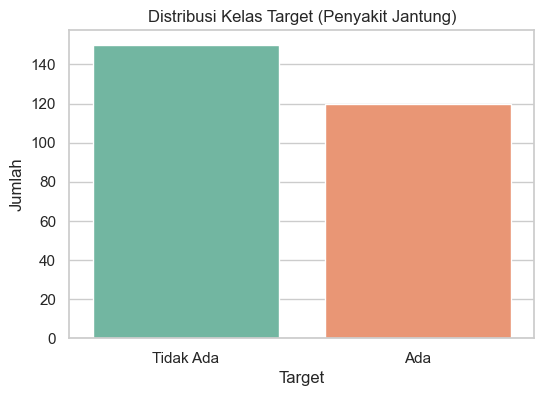

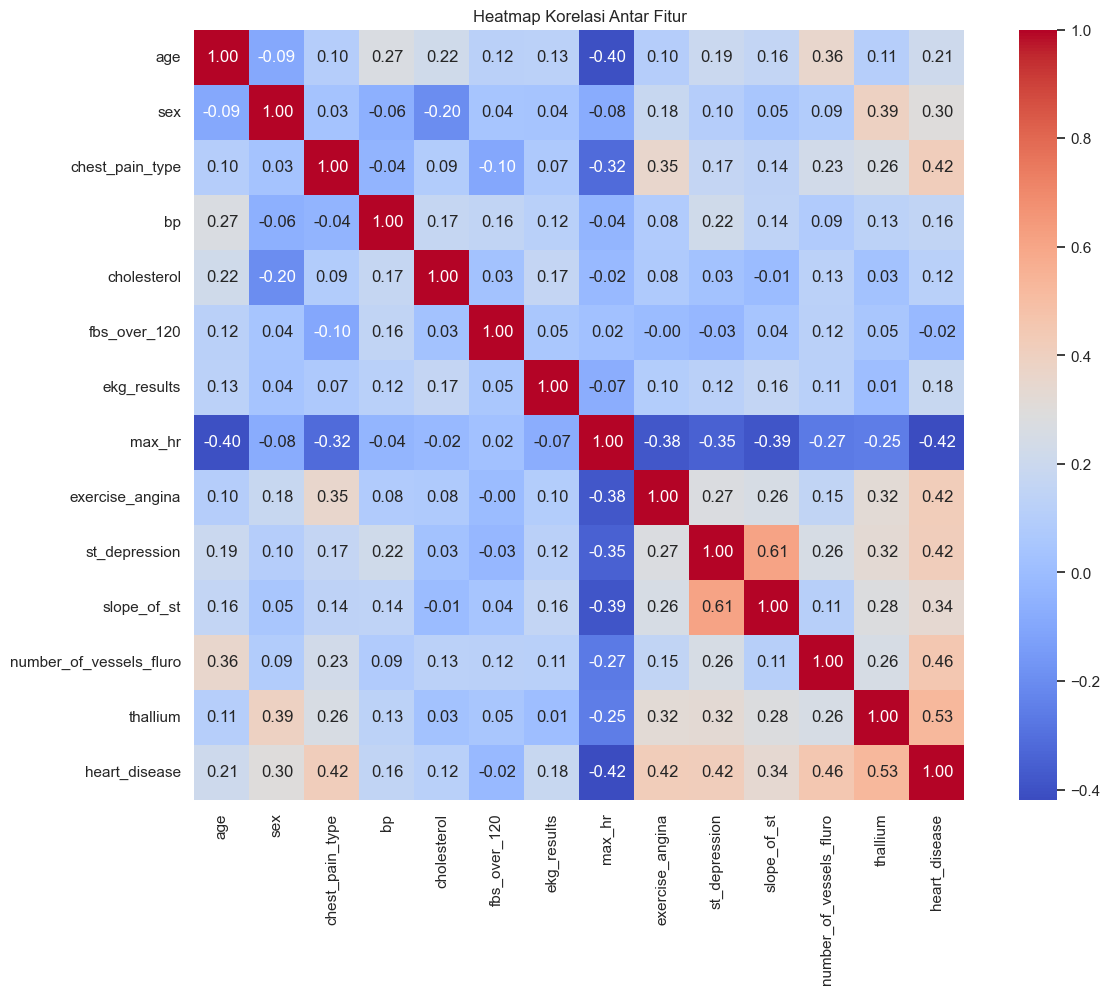

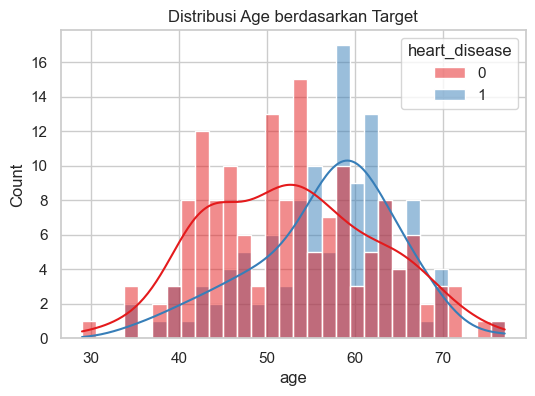

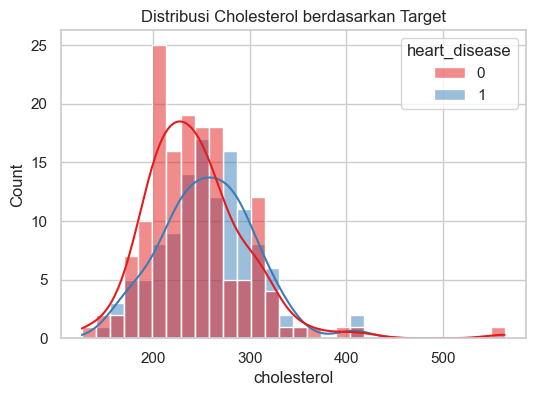

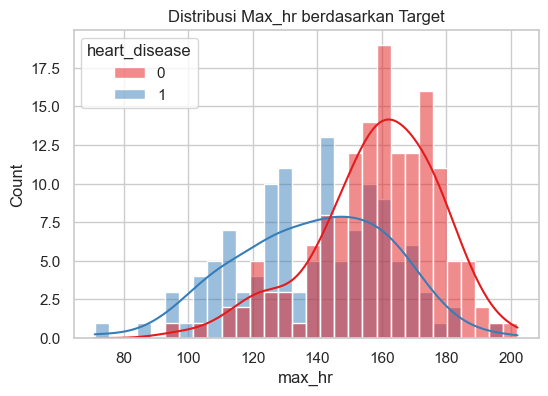

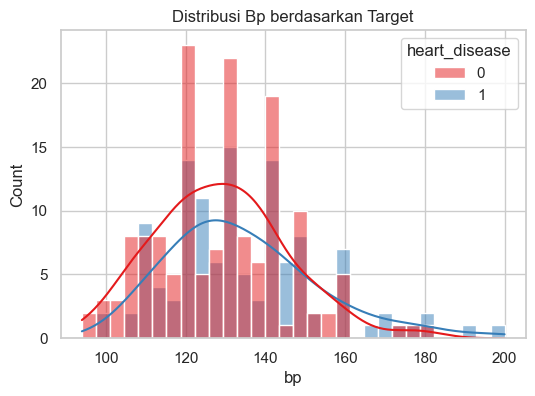

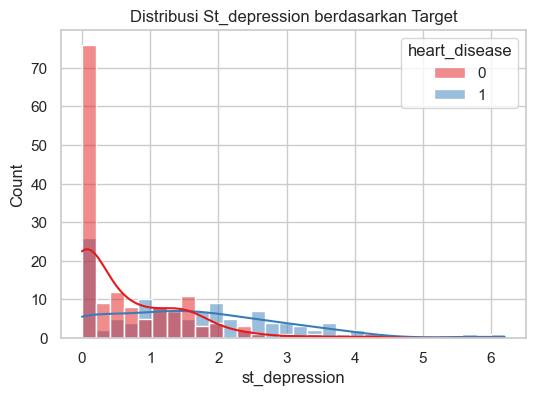

In [13]:
print("\nStatistik deskriptif:")
print(df.describe())

plt.figure(figsize=(6,4))
sns.countplot(x='heart_disease', data=df, palette='Set2')
plt.title('Distribusi Kelas Target (Penyakit Jantung)')
plt.xlabel('Target')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Tidak Ada', 'Ada'])
plt.show()

plt.figure(figsize=(14,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

features = ['age', 'cholesterol', 'max_hr', 'bp', 'st_depression']
for feature in features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=feature, hue='heart_disease', kde=True, bins=30, palette='Set1')
    plt.title(f'Distribusi {feature.capitalize()} berdasarkan Target')
    plt.show()

# Preprocessing dan Modeling (Random Forest)


Akurasi Model: 0.80

Confusion Matrix:
[[29  4]
 [ 7 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.78      0.67      0.72        21

    accuracy                           0.80        54
   macro avg       0.79      0.77      0.78        54
weighted avg       0.79      0.80      0.79        54



C:\Users\rizki\AppData\Local\Temp\ipykernel_14996\189331652.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette='viridis')


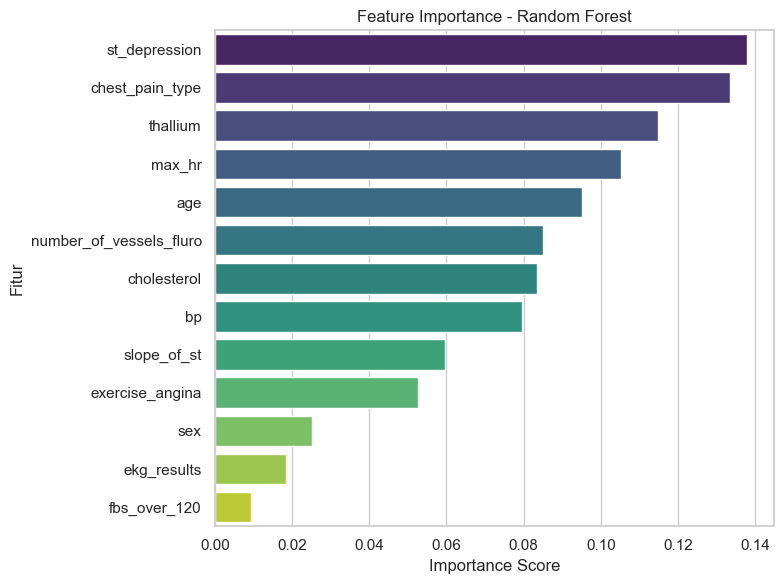

In [15]:
# === a. Pisahkan fitur dan target ===
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

# === b. Bagi data: 80% train, 20% test ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === c. Inisialisasi dan latih model Random Forest ===
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# === d. Prediksi dan evaluasi ===
y_pred = rf_model.predict(X_test)

# Akurasi
acc = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {acc:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# === e. Visualisasi fitur paling penting ===
importances = rf_model.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp, y=feat_imp.index, palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()

# Tuning Hyperparameter

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# === a. Siapkan parameter grid ===
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# === b. Buat model dasar Random Forest ===
rf = RandomForestClassifier(random_state=42)

# === c. GridSearchCV ===
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=1,
                           scoring='accuracy')

# === d. Fit ke data latih ===
grid_search.fit(X_train, y_train)

# === e. Lihat hasil terbaik ===
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy (CV):", grid_search.best_score_)

# === f. Evaluasi ulang dengan model terbaik ===
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Evaluasi
print("\nAkurasi di Data Test:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Accuracy (CV): 0.8430232558139534

Akurasi di Data Test: 0.8333333333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.83      0.71      0.77        21

    accuracy                           0.83        54
   macro avg       0.83      0.81      0.82        54
weighted avg       0.83      0.83      0.83        54



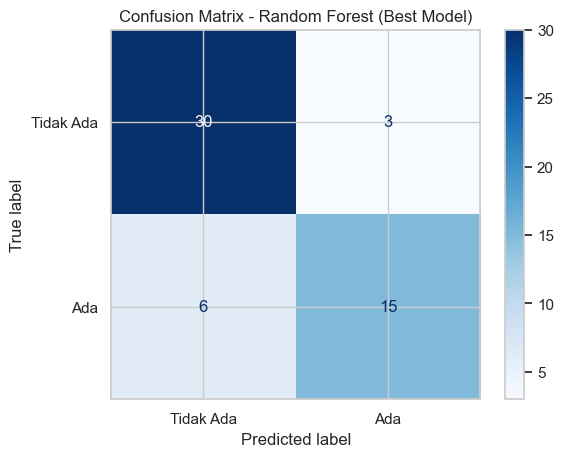

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Tampilkan heatmap confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Tidak Ada', 'Ada'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest (Best Model)")
plt.show()

In [19]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred_best, target_names=['Tidak Ada', 'Ada']))

Classification Report:

              precision    recall  f1-score   support

   Tidak Ada       0.83      0.91      0.87        33
         Ada       0.83      0.71      0.77        21

    accuracy                           0.83        54
   macro avg       0.83      0.81      0.82        54
weighted avg       0.83      0.83      0.83        54



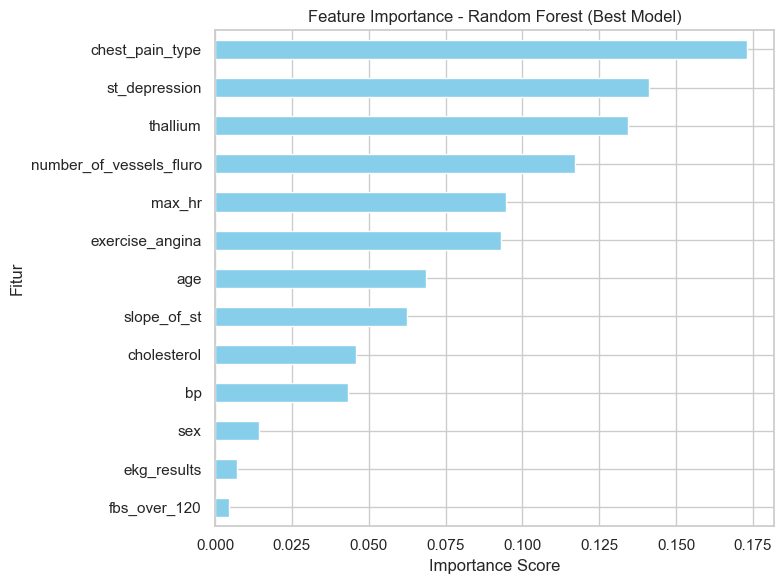

In [20]:
# Visualisasi fitur paling penting
importances = best_rf.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=True)

plt.figure(figsize=(8,6))
feat_imp.plot(kind='barh', color='skyblue')
plt.title("Feature Importance - Random Forest (Best Model)")
plt.xlabel("Importance Score")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()

In [21]:
import joblib

# Simpan model terbaik ke file
joblib.dump(best_rf, 'rfheart_model.pkl')
print("Model berhasil disimpan sebagai 'rfheart_model.pkl'")

Model berhasil disimpan sebagai 'rfheart_model.pkl'


In [22]:
print(df['thallium'].unique())

[3 7 6]
